# Gradient Descent + Gradient Boosting

**Group members: Yifeng Lin(Yifeng will finish assignments individually before final project), Yuan Zheng and Ziyang Guo**

## Introductions:  
  
  This is a dataset with more than 73,000 observations, each of which pertains to a particular NY State school district and associated subgroupings categorizations of high school students who had been enrolled for at least 4 years as of the end of the 2018-2019 school year. In this assignment, we will compare the performance of a decision tree, a random forest, Gradient Boosting Classifier, Stochastic Gradient Descent Classifier, and XG Boost Classifier.

## Data Set Attribute Description  
  
1. report_school_year: Indicates school year for which high school graduation info is being reported 
2. aggregation_index: Numeric code identifying manner in which high school graduation data has been aggregated 
3. aggregation_type: Text description of how high school graduation data has been aggregated 
4. nrc_code: Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district 
5. nrc_desc: Text description of the type of school district 
6. county_code: Numeric code for county name 
7. county_name: Full name of applicable NY State county 
8. nyc_ind: Indicates whether or not the school district resides within the borders of NYC 
9. membership_desc: Indicates school year in which students first enrolled in High School 
10. subgroup_code: Numeric code identifying student subgrouping 
11. subgroup_name: Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.) 
12. enroll_cnt: How many students of the indicated subgrouping were enrolled during the given school year 
13. grad_cnt: How many enrolled students of the indicated subgrouping graduated at the end of the given school year 
14. grad_pct: What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year 
15. local_cnt: How many enrolled students of the indicated subgrouping were awarded a "Local" diploma 
16. local_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma 
17. reg_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma 
18. reg_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma 
19. reg_adv_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma 
20. reg_adv_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma 
21. non_diploma_credential_cnt: How many enrolled students of the indicated subgrouping achieved a non-diploma credential 
22. non_diploma_credential_pct: What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential 
23. still_enrolled_cnt: How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled 
24. still_enrolled_pct: What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled 
25. ged_cnt: How many enrolled students of the indicated subgrouping were awarded a "GED" diploma 
26. ged_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma 
27. dropout_cnt: How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year 
28. dropout_pct: What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year 

## Exploratory Data Analysis:

In [1]:
# load the pandas & numpy libraries and matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data from github
data = pd.read_csv('https://raw.githubusercontent.com/Destiny-G1997/DAV-6150/main/Project1_Data.csv')
data

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-


In [3]:
data.shape

(73152, 29)

In [4]:
# find out how many missing value
data[data['enroll_cnt']=='-'].shape

(33478, 29)

In [5]:
# replace '-' as NaN 
data = data.replace('-',np.NaN)

In [6]:
# drop missing values
df=data.dropna(axis=0)

In [7]:
df.dtypes

report_school_year            object
aggregation_index              int64
aggregation_type              object
aggregation_name              object
nrc_code                       int64
nrc_desc                      object
county_code                    int64
county_name                   object
nyc_ind                        int64
membership_desc               object
subgroup_code                  int64
subgroup_name                 object
enroll_cnt                    object
grad_cnt                      object
grad_pct                      object
local_cnt                     object
local_pct                     object
reg_cnt                       object
reg_pct                       object
reg_adv_cnt                   object
reg_adv_pct                   object
non_diploma_credential_cnt    object
non_diploma_credential_pct    object
still_enr_cnt                 object
still_enr_pct                 object
ged_cnt                       object
ged_pct                       object
d

In [8]:
# transform data types
df['grad_pct']=df['grad_pct'].str.strip("%").astype(float)/100;
df['local_pct']=df['local_pct'].str.strip("%").astype(float)/100;
df['reg_pct']=df['reg_pct'].str.strip("%").astype(float)/100;
df['reg_adv_pct']=df['reg_adv_pct'].str.strip("%").astype(float)/100;
df['non_diploma_credential_pct']=df['non_diploma_credential_pct'].str.strip("%").astype(float)/100;
df['still_enr_pct']=df['still_enr_pct'].str.strip("%").astype(float)/100;
df['ged_pct']=df['ged_pct'].str.strip("%").astype(float)/100;
df['dropout_pct']=df['dropout_pct'].str.strip("%").astype(float)/100;

<ipython-input-8-06072730a2da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grad_pct']=df['grad_pct'].str.strip("%").astype(float)/100;
<ipython-input-8-06072730a2da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['local_pct']=df['local_pct'].str.strip("%").astype(float)/100;
<ipython-input-8-06072730a2da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [9]:
# transform data types
df['enroll_cnt']=df['enroll_cnt'].astype(float)
df['grad_cnt']=df['grad_cnt'].astype(float)
df['local_cnt']=df['local_cnt'].astype(float)
df['reg_cnt']=df['reg_cnt'].astype(float)
df['reg_adv_cnt']=df['reg_adv_cnt'].astype(float)
df['non_diploma_credential_cnt']=df['non_diploma_credential_cnt'].astype(float)
df['still_enr_cnt']=df['still_enr_cnt'].astype(float)
df['ged_cnt']=df['ged_cnt'].astype(float)
df['dropout_cnt']=df['dropout_cnt'].astype(float)

<ipython-input-9-f2c3b2865b28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enroll_cnt']=df['enroll_cnt'].astype(float)
<ipython-input-9-f2c3b2865b28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grad_cnt']=df['grad_cnt'].astype(float)
<ipython-input-9-f2c3b2865b28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [10]:
df_cat=df.iloc[:,:12]
df_num=df.iloc[:,12:]

In [11]:
# turn the name of each columns into list
column_cat=df_cat.columns.to_list()
column_num=df_num.columns.to_list()

<ipython-input-12-f5bee7815511>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


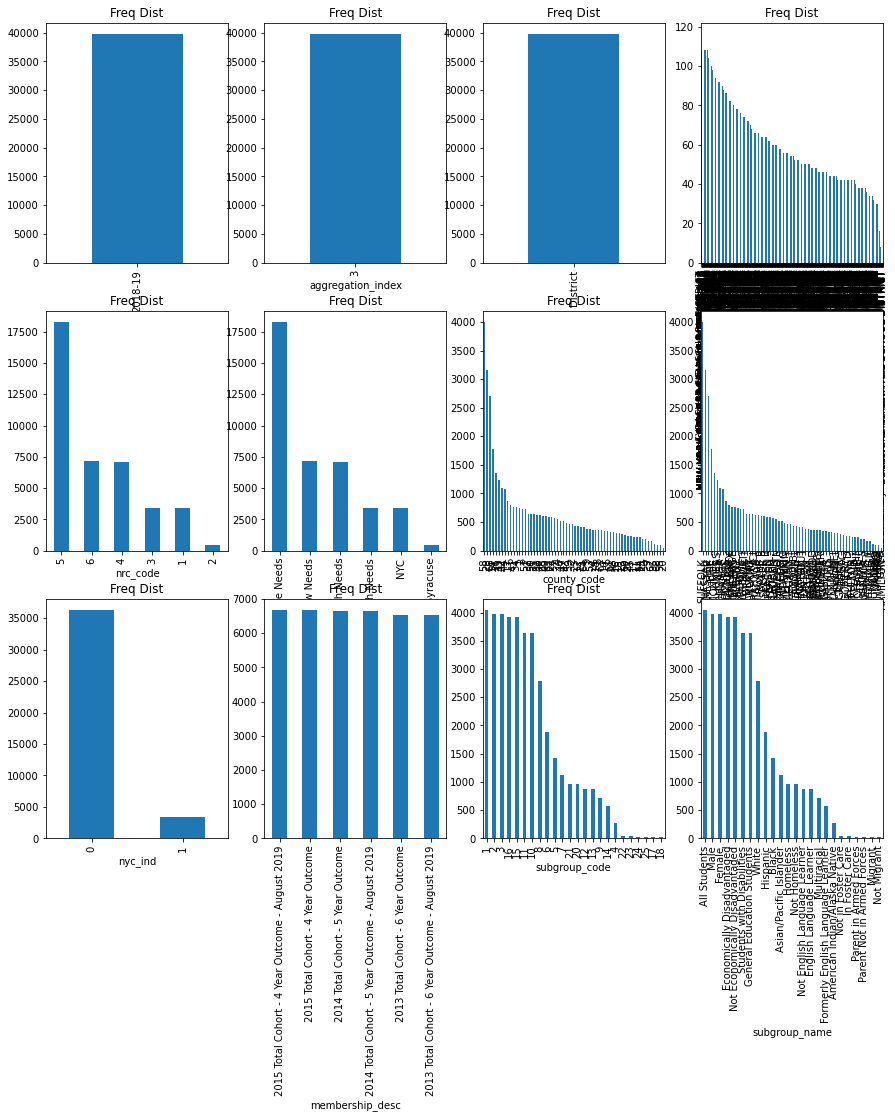

In [12]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(15,15))
for i in range(12):
    plt.subplot(3,4,i+1)
    df_cat[column_cat[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column_cat[i])
plt.tight_layout()

As shown in the above bar charts, we found that the first three features have only one value, and the type of school district mostly gathered at the 'Average Needs', the 'Buffalo Rochester Yonkers Syracuse is the least. As for the index of 'nyc_ind', we know that most school districts are not located in New York, and only nearly a little part of the school resides within the borders of NYC. 

C:\Users\guozi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guozi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guozi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guozi\anaconda3\lib\si

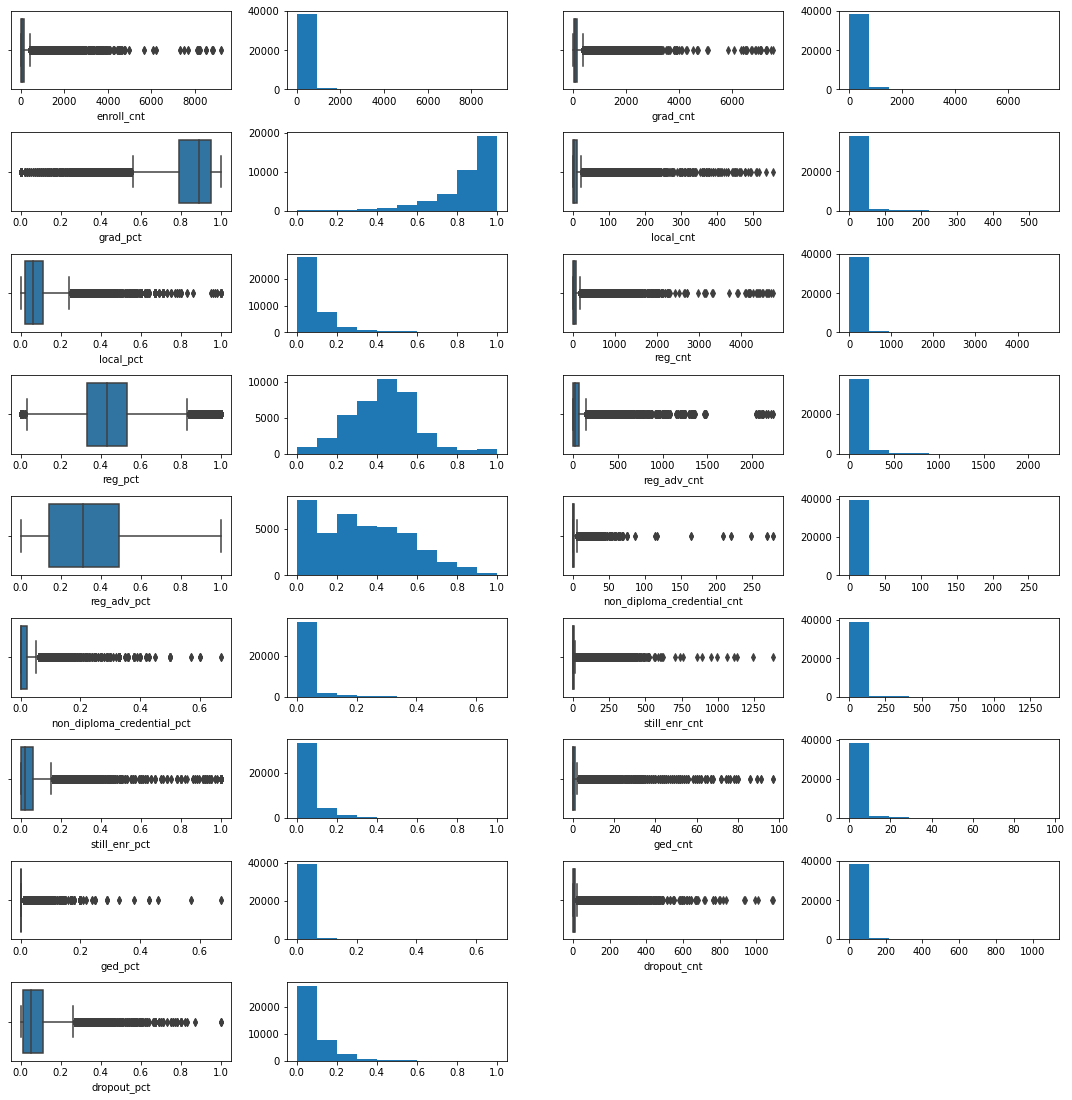

In [13]:
# show hist plot and boxplot of each attribute in the numerical dataset
fig=plt.figure(figsize=(15,20))
for i in range(17):
    n=2*i
    plt.subplot(12,4,n+1)
    sns.boxplot(df_num[column_num[i]])
    plt.subplot(12,4,n+2)
    plt.hist(df_num[column_num[i]])
    
plt.tight_layout()

As shown in the above boxplots and histograms
**According to the 'droppout_pct', we can know the value ranges from 0 to 0.4, the mean value of enrolled students' droppout_pct during the school year is under 0.1. Also, there are some outliers beyond 0.4 or even more.**

 **'droppout_cnt': The number of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year is ranged from 0 to 100, there are some outliers beyond 200 or even more.**
- As for the column 'grad_pct', we can judge from its box plot and histogram that its value gathered at a high value, which means at the end of the given school year, the enrolled students of the indicated subgrouping graduated to take a big part of the whole students.
- 'enroll_cnt','grad_cnt','reg_cnt':they have similar distribution and gathered at the small value bins. the histograms show they ranged from 0-2000.
- 'grad_pct': The value of 'grad_pct' at the end of the given school year ranges from 0.6 to 1.0, the mean value of that is more than 0.9. Also, there are some outliers less than 0.6 or even less.
- 'local_pct': The most value of 'local_pct' is range from 0-0.2, the mean value of that is under 0.1. Also, there are some outliers beyond 0.2 or even more.
- 'reg_cnt':  The number of enrolled students who are awarded a "Regents" diploma ranges from 0 to 1000. Also, there are some outliers beyond 1000 or even more.
- 'reg_pct': The percentage of enrolled students who are awarded a "Regents" diploma is ranged from 0 to 0.8. There are some outliers beyond 0.8
- 'reg_adv_cnt': The number of enrolled students of the indicated subgrouping was awarded a "Regents Advanced" diploma is ranged from 0 to 500. There are also some outliers beyond 1000 or even more.
- 'reg_adv_pct': The percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma is ranged from 0 to 1.0. There is no outliers in this attribute. And the mean value is nearly about 0.3 in this boxplot.
- 'non_diploma_credential_cnt': The number of enrolled students of the indicated subgrouping achieved a non-diploma is ranged from 0 to 25, there are also some outliers beyond 50 or even more.
- 'non_diploma_credential_pct': The percentage of enrolled students of the indicated subgrouping achieved a non-diploma is ranged from 0 to 0.1, and there are some outliers beyond 0.2 or even more.
- 'still_enr_cnt': The number of enrolled students of the indicated subgrouping did not graduate but were still_enrolled is ranged from 0 to 100, there are also some outliers beyond 250 or even more.
- 'still_enr_pct': The percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled is ranged from 0 to 0.2, there are some outliers beyond 0.2 or even more.
- 'ged_cnt': The number of enrolled students of the indicated subgrouping was awarded a "GED" diploma is ranged from 0 to 20, there are some outliers beyond 0.2 or even more.
- 'ged_pct': The percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma is ranged from 0 to 0.1, there are some outliers beyond 0.1 or even more.


## Data Preparation:  
  
  In data preparation, we will add the "dropout_pct_level". And after that, we will finish the standardization of numerical attributes. For the categorical we select in our model we will turn it into dummy variables. For applying XG Boost Classifier, we also will transform our response variable's type. "low" = 0, "medium" = 1, "High" = 2

In [14]:
reg = df['dropout_pct'].values.tolist()

In [15]:
# extract the median percentage of 'dropout_pct'
reg.sort()
mid = int(len(reg) / 2)
if len(reg) % 2 == 0:
    median = (reg[mid-1] + reg[mid]) / 2.0
else:
    median = reg[mid]
print("The median percentage of dropout_pct is",median)

The median percentage of dropout_pct is 0.05


In [16]:
# Create a new categorical variable 
def func(x):
    if x < 0.5*median:
        return "low"
    elif 0.5*median<x <1.5*median :
        return "medium"   
    else:
        return 'high'  

df['dropout_pct_level'] = df['dropout_pct'].apply(func)

<ipython-input-16-cf9c5220e344>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dropout_pct_level'] = df['dropout_pct'].apply(func)


In [17]:
# drop 'reg_pct' and 'reg_cnt'
df.drop(['dropout_pct','dropout_cnt'],axis=1,inplace=True)

C:\Users\guozi\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
# reset index for further use
df = df.reset_index(drop = True)

In [19]:
df.iloc[:,12:27]

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct
0,658.0,464.0,0.71,63.0,0.10,310.0,0.47,91.0,0.14,16.0,0.02,30.0,0.05,0.0,0.0
1,324.0,246.0,0.76,30.0,0.09,169.0,0.52,47.0,0.15,2.0,0.01,11.0,0.03,0.0,0.0
2,334.0,218.0,0.65,33.0,0.10,141.0,0.42,44.0,0.13,14.0,0.04,19.0,0.06,0.0,0.0
3,367.0,248.0,0.68,42.0,0.11,183.0,0.50,23.0,0.06,10.0,0.03,18.0,0.05,0.0,0.0
4,98.0,58.0,0.59,13.0,0.13,40.0,0.41,5.0,0.05,4.0,0.04,8.0,0.08,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39669,36.0,25.0,0.69,2.0,0.06,20.0,0.56,3.0,0.08,1.0,0.03,1.0,0.03,0.0,0.0
39670,48.0,43.0,0.90,3.0,0.06,32.0,0.67,8.0,0.17,0.0,0.00,0.0,0.00,0.0,0.0
39671,13.0,2.0,0.15,0.0,0.00,2.0,0.15,0.0,0.00,3.0,0.23,2.0,0.15,0.0,0.0
39672,33.0,23.0,0.70,0.0,0.00,20.0,0.61,3.0,0.09,3.0,0.09,0.0,0.00,0.0,0.0


In [20]:
df_num_matrix=df_num.corr()
df_num_matrix['dropout_pct'].sort_values(ascending=False)

dropout_pct                   1.000000
dropout_cnt                   0.230815
local_pct                     0.203903
still_enr_pct                 0.185580
non_diploma_credential_pct    0.140989
local_cnt                     0.135475
non_diploma_credential_cnt    0.129604
ged_pct                       0.104330
ged_cnt                       0.099411
still_enr_cnt                 0.081946
reg_cnt                       0.033453
enroll_cnt                    0.021982
grad_cnt                     -0.018238
reg_adv_cnt                  -0.139211
reg_pct                      -0.166014
reg_adv_pct                  -0.493922
grad_pct                     -0.770431
Name: dropout_pct, dtype: float64

According to the above analysis, we found that 'pct' has higher correlation between 'dropout_pct', thus we are going to drop cnt.

**Standardization:**

In [21]:
# load stadardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
# finish standardization
scaler = StandardScaler()
scaler.fit(df[['grad_pct','local_pct','reg_adv_pct','non_diploma_credential_pct','still_enr_pct','ged_pct','reg_pct']])
df_nums = pd.DataFrame(scaler.transform(df[['grad_pct','local_pct','reg_adv_pct','non_diploma_credential_pct','still_enr_pct','ged_pct','reg_pct']]),columns = ['grad_pct','local_pct','reg_adv_pct','non_diploma_credential_pct','still_enr_pct','ged_pct','reg_pct'])
df_nums

,grad_pct,local_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct,reg_pct
0,-0.855052,0.146183,-0.807673,0.063331,-0.021591,-0.308596,0.211909
1,-0.536160,0.050014,-0.764196,-0.182736,-0.248025,-0.308596,0.503885
2,-1.237722,0.146183,-0.851149,0.555465,0.091626,-0.308596,-0.080067
3,-1.046387,0.242352,-1.155485,0.309398,-0.021591,-0.308596,0.387095
4,-1.620392,0.434690,-1.198962,0.555465,0.318060,-0.308596,-0.138462
...,...,...,...,...,...,...,...
39669,-0.982608,-0.238493,-1.068532,0.309398,-0.248025,-0.308596,0.737467
39670,0.356737,-0.238493,-0.677243,-0.428803,-0.587676,-0.308596,1.379814
39671,-4.426639,-0.815507,-1.416344,5.230735,1.110579,-0.308596,-1.656739
39672,-0.918830,-0.815507,-1.025055,1.785799,-0.587676,-0.308596,1.029443


In [22]:
df['grad_pct'] = df_nums['grad_pct']
df['local_pct'] = df_nums['local_pct']
df['reg_adv_pct'] = df_nums['reg_adv_pct']
df['non_diploma_credential_pct'] = df_nums['non_diploma_credential_pct']
df['still_enr_pct'] = df_nums['still_enr_pct']
df['ged_pct'] = df_nums['ged_pct']
df['reg_pct'] = df_nums['reg_pct']

**Get Dummy:**

In [23]:
df_cat=df.iloc[:,:12]
df_cat

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...
39669,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,3,Male
39670,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,10,General Education Students
39671,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,11,Students with Disabilities
39672,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,15,Economically Disadvantaged


In [24]:
# get NOMINAL categorical attributes into dummy variables
df = pd.get_dummies(df,columns = ['nrc_desc'], prefix = ['nrc_desc'], prefix_sep = '_', dummy_na = False, drop_first = False)
df = pd.get_dummies(df,columns=['county_name'], prefix =['county_name'],prefix_sep = '_', dummy_na = False, drop_first = False)
df= pd.get_dummies(df,columns = ['nyc_ind'], prefix = ['nyc_ind'], prefix_sep = '_', dummy_na = False, drop_first = False)
df = pd.get_dummies(df,columns = ['membership_desc'], prefix = ['membership_desc'], prefix_sep = '_', dummy_na = False, drop_first = False)
df = pd.get_dummies(df,columns = ['subgroup_name'], prefix = ['subgroup_name'], prefix_sep = '_', dummy_na = False, drop_first = False)

## Prepared Data Review:

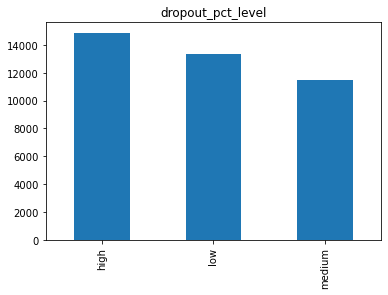

In [25]:
df['dropout_pct_level'].value_counts().plot.bar(title = "dropout_pct_level")

- As shown in the above bar chart, we may know that there are three kinds of dropout level which is categorized by the 'dropout_pct': High, low, and medium.
- The high level has the highest number among these three, which equals nearly 15000, and next comes the low level is about 13000, the attribute of 'medium' have the least number equals to less than 12000.

In [26]:
df_cat2=df.iloc[:,23:]
column_cat2=df_cat2.columns.to_list()

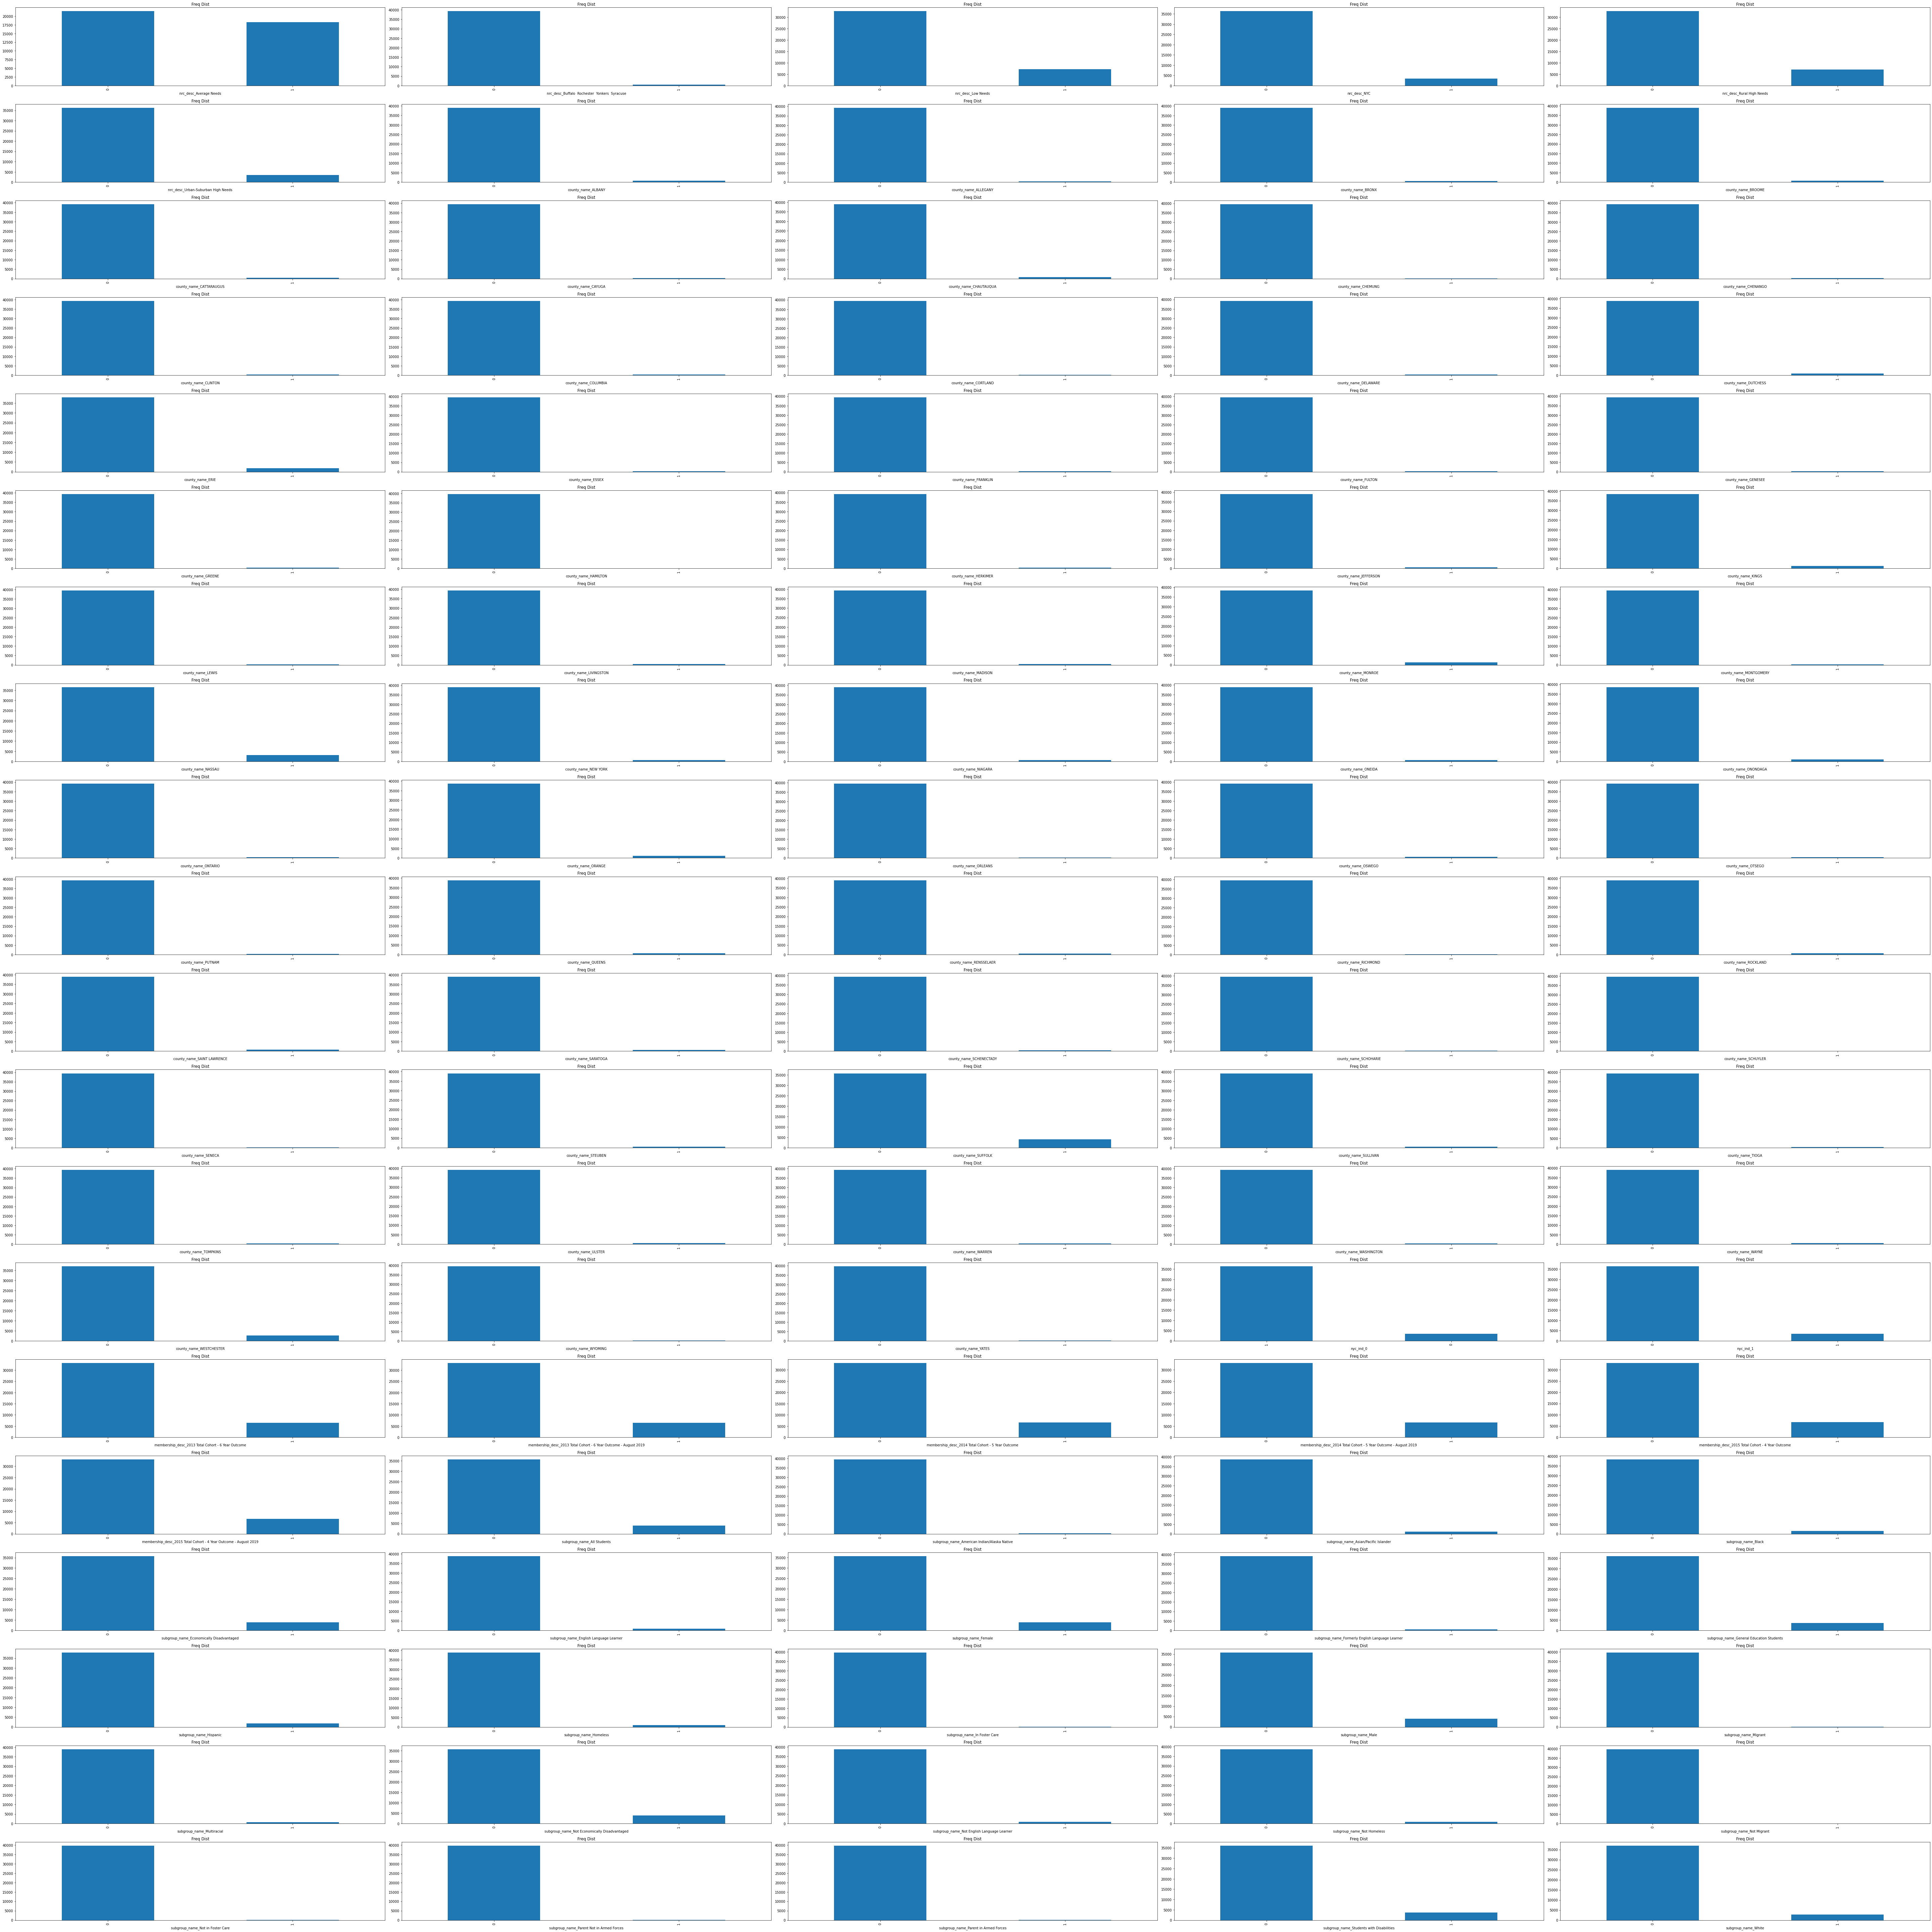

In [27]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(80,80))
for i in range(len(column_cat2)):
    plt.subplot(20,5,i+1)
    df_cat2[column_cat2[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column_cat2[i])
plt.tight_layout()

As shown in the above bar charts, we can see that most categorical attributes have been transformed to the dummy variable.

## Classifier Modeling:

**Feature selection**

We are going to use SelectKbest and chi2 to do the feature selection. After selection, we will get the top 5 categorical data and use top3 of them to do our further study. As for the numercial data we will select the most relevant 3 numerical variables.

In [30]:
df_num_matrix=df_num.corr()
df_num_matrix['dropout_pct'].sort_values(ascending=False)

dropout_pct                   1.000000
dropout_cnt                   0.230815
local_pct                     0.203903
still_enr_pct                 0.185580
non_diploma_credential_pct    0.140989
local_cnt                     0.135475
non_diploma_credential_cnt    0.129604
ged_pct                       0.104330
ged_cnt                       0.099411
still_enr_cnt                 0.081946
reg_cnt                       0.033453
enroll_cnt                    0.021982
grad_cnt                     -0.018238
reg_adv_cnt                  -0.139211
reg_pct                      -0.166014
reg_adv_pct                  -0.493922
grad_pct                     -0.770431
Name: dropout_pct, dtype: float64

In [31]:
df2=df.iloc[:,23:]

In [32]:
from sklearn.feature_selection import SelectKBest, chi2
# Select top 5 categorical data
Select=SelectKBest(chi2, k=5)
fit2=Select.fit(df2, df['dropout_pct_level'])
scores2 = pd.DataFrame(fit2.scores_)
columns2 = pd.DataFrame(df2.columns)
featureScores2 = pd.concat([columns2,scores2],axis=1)
featureScores2.columns = ['Features','Score']
featureScores2.sort_values(by="Score" , ascending=False).head(5)

,Features,Score
2,nrc_desc_Low Needs,5571.969993
5,nrc_desc_Urban-Suburban High Needs,2139.478165
3,nrc_desc_NYC,1745.474348
69,nyc_ind_1,1745.474348
35,county_name_NASSAU,1313.084469


According to the feature select score result, We will select the Top 3 attributes in categorical data and most relevant 3 numerical variables.

**Decision Tree Classifier:**

**Hyperparameter:**
  
random_state: Controls the randomness of the estimator.
    
max_depth: The maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.  
  
critierion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

In [33]:
X = df[['still_enr_pct','local_pct','non_diploma_credential_pct','nrc_desc_Low Needs','nrc_desc_Urban-Suburban High Needs','nrc_desc_NYC']].copy()
Y = df.dropout_pct_level

In [34]:
# load and finish train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [35]:
# load decision tree classifier from sklearn library
# load cross_val_score to get the score of each model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# Find most suitable max_depth in Decisin Tree Classifier
# we choose the criterion as entropy for better accuracy
testscore=[]
for i in range(30):
    clf = DecisionTreeClassifier(random_state=42,max_depth=i+1,criterion = 'entropy')
    clf = clf.fit(X_train, Y_train)
    score_test = cross_val_score(clf,X_test,Y_test,cv=10).mean()    
    testscore.append(score_test)
print(max(testscore))
print(testscore.index(max(testscore)))

0.5754260357472976
11


In [36]:
# for the parameter we choose to set max_depth as 11
# set random_state as 42 to control the randomness of the estimator
dt = DecisionTreeClassifier(random_state=42, max_depth=11)

In [37]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [38]:
dt.score(X_train, Y_train)

0.6138819748574309

This model has an accuracy of 61.38% when applying Decision Tree Classifier.

**Random Forest Classifier:**

**Hyperparameter:**  
  
random_state: Controls the randomness of the estimator.

max_depth: The maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.  

n_estimators: The number of trees in the forest. We are going to use cross validation to calculate best value of n.


In [39]:
# load the random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Find most suitable n_estimators in RandomForest model
testscore2=[]
for i in range(100):
    clf2 =  RandomForestClassifier(n_estimators=i+1,random_state=42)
    clf2 = clf2.fit(X_train, Y_train)
    score_te2 = cross_val_score(clf2,X_test,Y_test,cv=10).mean()    
    testscore2.append(score_te2)
print(max(testscore2))
print(testscore2.index(max(testscore2)))

0.5819796011066607
87


In [41]:
# Find most suitable max_depth in RandomForest model
testscore3=[]
for i in range(40):
    clf3 = RandomForestClassifier(random_state=42,max_depth=i+1,criterion = 'gini',n_estimators=87)
    clf3= clf3.fit(X_train,Y_train)
    score_te3 = cross_val_score(clf3,X_test,Y_test,cv=10).mean() 
    testscore3.append(score_te3)
print(max(testscore3))
print(testscore3.index(max(testscore3)))

0.5838711521785396
9


In [42]:
# # set random_state as 42 to control the randomness of the estimator
rf = RandomForestClassifier(random_state=42,max_depth=9,n_estimators=87)

In [43]:
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=9, n_estimators=87, random_state=42)

In [44]:
rf.score(X_train, Y_train)

0.6047134440278522

This model has an accuracy of 60.47% when applying Random Forest Classifier.

**Gradient Boosting Classifier:**

**Hyperparameter:**  
    
n_estimators: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.  
  
learning_rate: Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.  
  
random_state: Controls the randomness of the estimator.  
  
max_depth: The maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.  

In [45]:
# load the Gradient Boosting Classifier from sklearn library
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
# Find most suitable max_depth in Gradien Boosting Classifier
testscore4=[]
for i in range(30):
    clf4 = GradientBoostingClassifier(random_state=42,max_depth=i+1,learning_rate=1.0)
    clf4= clf4.fit(X_train,Y_train)
    score_te4 = clf4.score(X_test,Y_test)
    testscore4.append(score_te4)
print(max(testscore4))
print(testscore4.index(max(testscore4)))

0.6118462507876496
5


In [47]:
# set n_estimators as 100  as default for better performance
# for the parameter we choose to set max_depth as 5
# set random_state as 42 to control the randomness of the estimator
mgb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=5, random_state=42).fit(X_train, Y_train)

In [48]:
mgb.score(X_train, Y_train)

0.6572985916380478

This model has an accuracy of 65.72% when applying Gradient Boosting Classifier.

**Stochastic Gradient Descent Classifier:**

**Hyperparameter:**  
  
loss: The loss function to be used. Defaults to ‘hinge’, which gives a linear SVM.The possible options are ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, or a regression loss: ‘squared_error’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’.The ‘log’ loss gives logistic regression, a probabilistic classifier. 

max_iter: The maximum number of passes over the training data we need to use score to get the most suitable value in this model

In [49]:
# load the Stochastic Gradient Descent Classifier from sklearn library
from sklearn.linear_model import SGDClassifier

In [50]:
# Find most suitable max_iter in SGD Classifier.
testscore6=[]
for i in range(30):
    clf6= SGDClassifier(random_state=42,loss="log", max_iter=i+1)
    clf6= clf6.fit(X_train,Y_train)
    score_te6=clf6.score(X_test,Y_test)
    testscore6.append(score_te6)
print(max(testscore6))
print(testscore6.index(max(testscore6)))   

C:\Users\guozi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\guozi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\guozi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\guozi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

0.5521109010712035
14


In [51]:
# For logistics model we set loss as "log"
msgd = SGDClassifier(loss="log",max_iter=14,random_state=42)

In [52]:
msgd.fit(X_train, Y_train)

C:\Users\guozi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(loss='log', max_iter=14, random_state=42)

In [53]:
msgd.score(X_train, Y_train)

0.5461419704464539

This model has an accuracy of 54.61% when applying Stochastic Gradient Descent Classifier.

**XG Boost Classifier:**

In [54]:
# load the XG Boost Classifier from sklearn library
from xgboost import XGBClassifier
xgc = XGBClassifier()

In [55]:
xgc.fit(X_train, Y_train)

C:\Users\guozi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [56]:
xgc.score(X_train, Y_train)

0.6241847569236586

This model has an accuracy of 62.41% when applying XG Boost Classifier.

## Select Models:

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics 

We are going to use F1 score as our selection criteria. F1 is the harmonic average of precision and recall, that will be good to select the best model here.

**F1 score of Decision Tree Classifier:**

In [58]:
precisionDT = cross_val_score(dt,X_train,Y_train,cv=10,scoring='f1_macro').mean()
precisionDT

0.5780100175561337

**F1 score of Random Forest Classifier:**

In [59]:
precisionRF = cross_val_score(rf,X_train,Y_train,cv=10,scoring='f1_macro').mean()
precisionRF

0.5796519473190159

**F1 score of Gradient Boosting Classifier**

In [60]:
precisionGB = cross_val_score(mgb, X_train, Y_train, cv = 10, scoring = 'f1_macro').mean()
precisionGB

0.5894193971041432

**F1 score of Stochastic Gradient Descent Classifier:**

In [61]:
precisionSGD = cross_val_score(msgd, X_train, Y_train, cv = 10, scoring = 'f1_macro').mean()
precisionSGD

C:\Users\guozi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\guozi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\guozi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\guozi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

0.5440792268760871

**F1 score of XG Boost Classifier:**

In [62]:
precisionXG = cross_val_score(xgc, X_train, Y_train, cv = 10, scoring = 'f1_macro').mean()
precisionXG

C:\Users\guozi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:50:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.5877728723526767

According to the F1 score of these 5 moedels, we can see that the  XG Boost Classifier has the highest f1 score among these 5 model which is 58.78%

**Model Evaluation:**

**Evaluation metrics of Decision Tree Classifier:**

In [63]:
predictedDT = dt.predict(X_test)
predictedDT

array(['medium', 'medium', 'high', ..., 'medium', 'low', 'low'],
      dtype=object)

In [64]:
probsDT = dt.predict_proba(X_test)
probsDT

array([[0.35135135, 0.25      , 0.39864865],
       [0.35722543, 0.15953757, 0.48323699],
       [0.875     , 0.0375    , 0.0875    ],
       ...,
       [0.10769231, 0.26153846, 0.63076923],
       [0.30769231, 0.53846154, 0.15384615],
       [0.        , 1.        , 0.        ]])

In [65]:
Y_test.shape

(7935,)

In [66]:
print(metrics.confusion_matrix(Y_test, predictedDT))
print(metrics.classification_report(Y_test, predictedDT))

[[2006  367  598]
 [ 525 1499  648]
 [ 670  463 1159]]
              precision    recall  f1-score   support

        high       0.63      0.68      0.65      2971
         low       0.64      0.56      0.60      2672
      medium       0.48      0.51      0.49      2292

    accuracy                           0.59      7935
   macro avg       0.58      0.58      0.58      7935
weighted avg       0.59      0.59      0.59      7935



In [67]:
Null_error_rate_DT = 1-(2006/7935)

**Evaluation metrics of Random Forest Classifier:**

In [68]:
predictedRF = rf.predict(X_test)
predictedRF

array(['medium', 'medium', 'high', ..., 'medium', 'high', 'low'],
      dtype=object)

In [69]:
probsRF = rf.predict_proba(X_test)
probsRF

array([[0.32355856, 0.22878248, 0.44765896],
       [0.36676002, 0.17893007, 0.45430991],
       [0.65726242, 0.18842718, 0.1543104 ],
       ...,
       [0.26451077, 0.24176857, 0.49372066],
       [0.45732429, 0.2196713 , 0.32300441],
       [0.04329873, 0.9070037 , 0.04969757]])

In [70]:
print(metrics.confusion_matrix(Y_test, predictedRF))
print(metrics.classification_report(Y_test, predictedRF))

[[2121  298  552]
 [ 615 1416  641]
 [ 728  419 1145]]
              precision    recall  f1-score   support

        high       0.61      0.71      0.66      2971
         low       0.66      0.53      0.59      2672
      medium       0.49      0.50      0.49      2292

    accuracy                           0.59      7935
   macro avg       0.59      0.58      0.58      7935
weighted avg       0.59      0.59      0.59      7935



In [71]:
Null_error_rate_RF = 1-(2121/7935)

**Evaluation metrics of Gradient Boosting Classifier:**

In [72]:
predictedGB = mgb.predict(X_test)
predictedGB

array(['high', 'medium', 'low', ..., 'medium', 'low', 'low'], dtype=object)

In [73]:
probsGB = mgb.predict_proba(X_test)
probsGB

array([[4.02530288e-01, 2.44692616e-01, 3.52777096e-01],
       [2.66480138e-01, 1.37515306e-01, 5.96004557e-01],
       [1.64456093e-01, 8.05713348e-01, 2.98305593e-02],
       ...,
       [1.24562055e-01, 2.63855280e-01, 6.11582664e-01],
       [1.49456496e-01, 7.42140803e-01, 1.08402701e-01],
       [6.81637508e-04, 9.99120783e-01, 1.97579919e-04]])

In [74]:
print(metrics.confusion_matrix(Y_test, predictedGB))
print(metrics.classification_report(Y_test, predictedGB))

[[1904  410  657]
 [ 448 1598  626]
 [ 528  466 1298]]
              precision    recall  f1-score   support

        high       0.66      0.64      0.65      2971
         low       0.65      0.60      0.62      2672
      medium       0.50      0.57      0.53      2292

    accuracy                           0.60      7935
   macro avg       0.60      0.60      0.60      7935
weighted avg       0.61      0.60      0.61      7935



In [75]:
Null_error_rate_GB = 1-(1904/7935)

**Evaluation metrics of Stochastic Gradient Descent Classifier:**

In [76]:
predictedSGD = msgd.predict(X_test)
predictedSGD

array(['medium', 'medium', 'high', ..., 'medium', 'high', 'high'],
      dtype='<U6')

In [77]:
probsSGD = msgd.predict_proba(X_test)
probsSGD

array([[0.3732757 , 0.25085929, 0.37586501],
       [0.28802695, 0.28476657, 0.42720648],
       [0.55163455, 0.17175436, 0.27661109],
       ...,
       [0.34500592, 0.26385573, 0.39113835],
       [0.37983311, 0.27572759, 0.34443929],
       [0.91923406, 0.03220957, 0.04855637]])

In [78]:
print(metrics.confusion_matrix(Y_test, predictedSGD))
print(metrics.classification_report(Y_test, predictedSGD))

[[1772  125 1074]
 [ 441 1034 1197]
 [ 574  224 1494]]
              precision    recall  f1-score   support

        high       0.64      0.60      0.62      2971
         low       0.75      0.39      0.51      2672
      medium       0.40      0.65      0.49      2292

    accuracy                           0.54      7935
   macro avg       0.59      0.55      0.54      7935
weighted avg       0.60      0.54      0.54      7935



In [79]:
Null_error_rate_SGD = 1-(1772/7935)

**Evaluation metrics of XG Boost Classifier:**

In [80]:
predictedXG = xgc.predict(X_test)
predictedXG

array(['medium', 'medium', 'high', ..., 'medium', 'low', 'low'],
      dtype=object)

In [81]:
probsXG = xgc.predict_proba(X_test)
probsXG

array([[0.34158117, 0.1734411 , 0.48497775],
       [0.3463247 , 0.16802953, 0.4856457 ],
       [0.6988664 , 0.1495219 , 0.15161172],
       ...,
       [0.2347404 , 0.25452125, 0.5107384 ],
       [0.3197114 , 0.44787973, 0.23240894],
       [0.00199773, 0.9851752 , 0.01282715]], dtype=float32)

In [82]:
print(metrics.confusion_matrix(Y_test, predictedXG))
print(metrics.classification_report(Y_test, predictedXG))

[[2014  342  615]
 [ 515 1485  672]
 [ 664  444 1184]]
              precision    recall  f1-score   support

        high       0.63      0.68      0.65      2971
         low       0.65      0.56      0.60      2672
      medium       0.48      0.52      0.50      2292

    accuracy                           0.59      7935
   macro avg       0.59      0.58      0.58      7935
weighted avg       0.59      0.59      0.59      7935



In [83]:
Null_error_rate_XG = 1-(2014/7935)

In [84]:
print(metrics.accuracy_score(Y_test, predictedDT))
print(metrics.accuracy_score(Y_test, predictedRF))
print(metrics.accuracy_score(Y_test, predictedGB))
print(metrics.accuracy_score(Y_test, predictedSGD))
print(metrics.accuracy_score(Y_test, predictedXG))

0.587775677378702
0.5900441083805923
0.6049149338374291
0.5419029615626969
0.5901701323251418


In [85]:
print(Null_error_rate_DT)
print(Null_error_rate_RF)
print(Null_error_rate_GB)
print(Null_error_rate_SGD)
print(Null_error_rate_XG)

0.7471959672337745
0.732703213610586
0.7600504095778198
0.7766855702583491
0.7461877756773787


| Metric        | Model DT | Model RF | Model GB | Model SGD | Model XG
| ------------- | ------- | -------   |------    |-------    |-----   
| Accuracy      | 0.59    |   0.59    |   0.60 |  0.54  | 0.59
| Precision |  0.63  |    0.61  |          0.66 |       0.64  |   0.63
| Recall   |  0.68 |    0.71     |  0.64  |    0.60    |   0.68
| F1 Score  |  0.65  | 0.66  |   0.65  | 0.62 | 0.65
|Null error rate|  0.75   |   0.73    |     0.76    |   0.78    |0.75

## Conclusion:  
  
According to the model evaluation result,the decision tree, random forest, XG Boost and Model GB perform similarly in aspects. The model stochastic gradient descent classifier behaviors worst among these five models. But the random forest has lower Null error rate. Above all, the random forest classifier shows the best accuracy and efficiency among these 5 models.